# KNN Testing
## NOAA Recreational Fishing Data

In [1]:
%matplotlib inline
import random
import sys

import pandas as pd
import numpy as np
from scipy.spatial import KDTree
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

sys.setrecursionlimit(10000)

In [2]:
catch_df = pd.read_csv("data/NOAA Recreational Fishing/ps_2020_preliminary_csv/catch_20201.csv")
catch_df.columns

Index(['common', 'strat_id', 'psu_id', 'YEAR', 'ST', 'MODE_FX', 'AREA_X',
       'ID_CODE', 'SUB_REG', 'WAVE', 'kod', 'SP_CODE', 'CLAIM', 'RELEASE',
       'HARVEST', 'CLAIM_UNADJ', 'HARVEST_UNADJ', 'RELEASE_UNADJ', 'tot_len_a',
       'wgt_a', 'tot_len_b1', 'wgt_b1', 'region', 'month', 'wp_int', 'fl_reg',
       'wp_catch', 'tot_cat', 'wgt_ab1', 'tot_len', 'landing', 'var_id',
       'arx_method', 'alt_flag', 'date_published'],
      dtype='object')

In [3]:
columns_keep = ['common', 'MODE_FX', 'ID_CODE', 'CLAIM', 'RELEASE', 'HARVEST', 'WAVE',
                'total_len_a', 'wgt_a', 'tot_len_b1', 'wgt_b1', 'month', 'wp_int'] 

Text(0, 0.5, 'Common Fish Name')

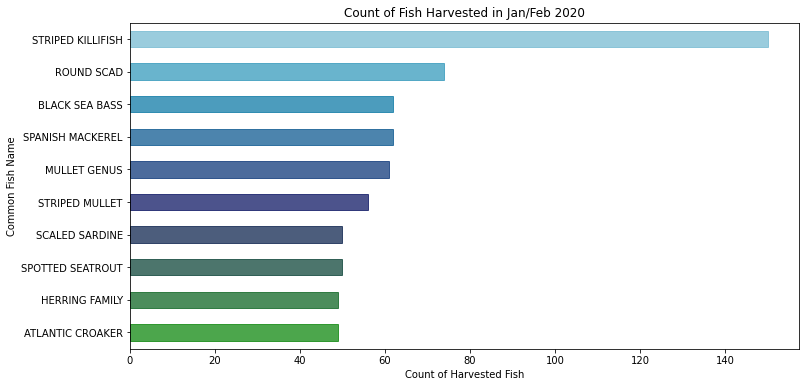

In [12]:
ax = catch_df.groupby('common').HARVEST.sum().sort_values().dropna().iloc[-10:].plot.barh(
    title="Count of Fish Harvested in Jan/Feb 2020", figsize = (12,6))

rng = np.random.default_rng()
#...rng.choice(a = plt.cm.ocean(np.arange(256), alpha = .7), size = 10)):

for bar, c in zip(ax.patches, rng.choice(a=plt.cm.ocean(np.arange(256)[0:230:23],alpha = .7),size=10, replace = False, shuffle=False)):
    bar.set_color(c)
plt.xlabel('Count of Harvested Fish')
plt.ylabel('Common Fish Name')

In [75]:
#assign 'ocean' colors to common fish names
color = {}
for name, co in zip(catch_df.common.unique(),plt.cm.ocean(np.arange(256)[0:256],alpha = .7)):
    color[name] = co

<AxesSubplot:xlabel='HARVEST', ylabel='RELEASE'>

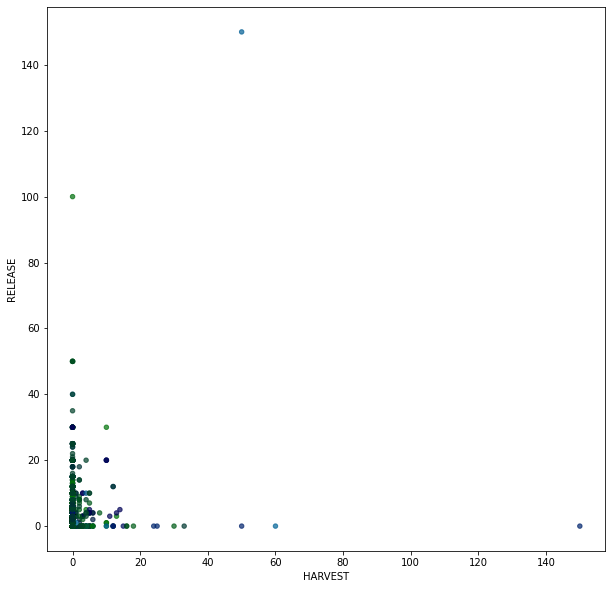

In [80]:
catch_df.plot(x = 'HARVEST', y = 'RELEASE', kind = 'scatter', c = catch_df['common'].map(color), figsize = (10,10))

<AxesSubplot:xlabel='tot_len_a', ylabel='wgt_a'>

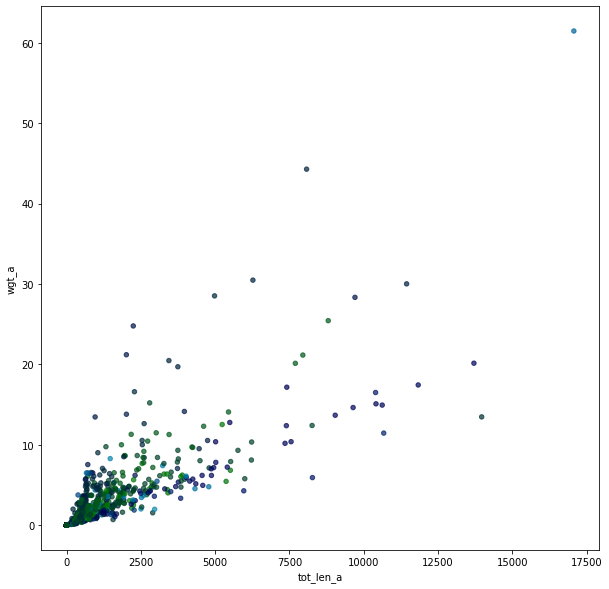

In [82]:
catch_df.plot(x = 'tot_len_a', y = 'wgt_a', kind = 'scatter', c = catch_df['common'].map(color), figsize = (10,10))

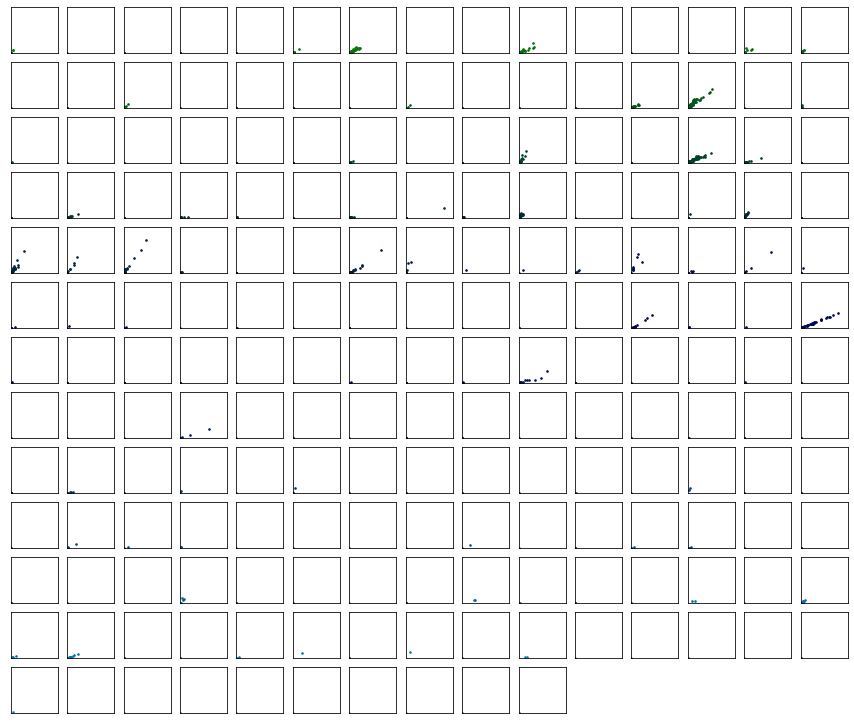

In [167]:
fig, axes = plt.subplots(nrows = 13, ncols = 15, figsize = (15, 13))
axes = axes.flatten()
weight_lim = (catch_df.wgt_a.min(), catch_df.wgt_a.max())
length_lim = (catch_df.tot_len_a.min(), catch_df.tot_len_a.max())

for ax, fish, c in zip(axes, catch_df.common.unique(), plt.cm.ocean(np.arange(256)[0:190])):
    fish_data = catch_df.loc[lambda catch_df: catch_df['common'] == fish, :][['tot_len_a','wgt_a']]
    ax.scatter(fish_data.tot_len_a, fish_data.wgt_a, color = c, s = 2.5)
    ax.set_xlim(xmin = length_lim[0], xmax = length_lim[1])
    ax.set_ylim(ymin = weight_lim[0], ymax = weight_lim[1])
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)

for ax in axes[len(catch_df.common.unique()):]:
    ax.remove()